In [45]:
#%%
# Import required libraries for data processing, control systems, and plotting
import scipy.io as sio
import numpy as np
from control import TransferFunction, forced_response
import matplotlib.pyplot as plt

In [46]:
#%%
# Load encoder data from .mat file
mat_data = sio.loadmat('data/encodervals.mat')

# Check for 'encoder_output' and flatten it
if 'encoder_output' in mat_data:
    encoder_output = mat_data['encoder_output'].flatten()
else:
    print("Warning: 'encoder_output' not found. Only model outputs will be plotted.")
    encoder_output = None

# Define time vector (4422 points from 0 to 10s)
n_points = 4422
t_max = 10
time = np.linspace(0, t_max, n_points)

# Define pulse input (2.7V from 1.766s to 5.7s)
pulse_magnitude = 2.7
pulse_start = 1.766
pulse_end = 5.7
pulse_duration = pulse_end - pulse_start
u = np.zeros_like(time)
u[(time >= pulse_start) & (time <= pulse_end)] = pulse_magnitude

In [47]:
#%%
# Calculate input area
input_area = pulse_magnitude * pulse_duration
print(f"Input Area = {input_area} V·s")

# Calculate steady-state output value (last 10% of data)
if encoder_output is not None:
    idx_last_10percent = np.arange(int(0.9 * len(time)), len(time))
    output_value = np.mean(encoder_output[idx_last_10percent])
    print(f"Steady-State Output Value = {output_value} Rotations")
    
    # Calculate gain K
    K = output_value / input_area
    print(f"Calculated K = {K}")
else:
    K = 1.437540796265998  # Fallback value if no encoder data
    print(f"No encoder data. Using default K = {K}")

Input Area = 10.6218 V·s
Steady-State Output Value = 15.26927082977818 Rotations
Calculated K = 1.437540796265998


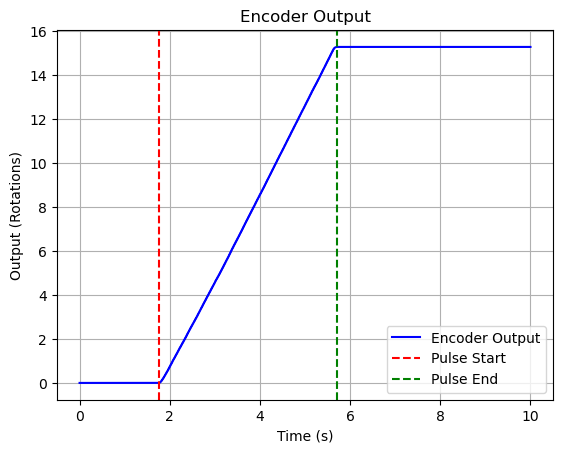

In [48]:
#%%
# Plot encoder output with pulse start/end lines
if encoder_output is not None:
    plt.figure()
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label="Encoder Output")
    plt.axvline(x=pulse_start, color='r', linestyle='--', label="Pulse Start")
    plt.axvline(x=pulse_end, color='g', linestyle='--', label="Pulse End")
    plt.xlabel('Time (s)')
    plt.ylabel('Output (Rotations)')
    plt.title('Encoder Output')
    plt.legend()
    plt.grid(True)
    plt.show()

In [49]:
#%%
# Define system parameters
wn = 48
zeta = 1

# First-order model: G(s) = K/s
G_first = TransferFunction([K], [1, 0])

# Second-order model: G(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)
G_second = TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])

# Full third-order model: G(s) = (K/s) * (second-order)
G_full = G_first * G_second

# Simulate responses
_, y_first = forced_response(G_first, T=time, U=u)
_, y_full = forced_response(G_full, T=time, U=u)

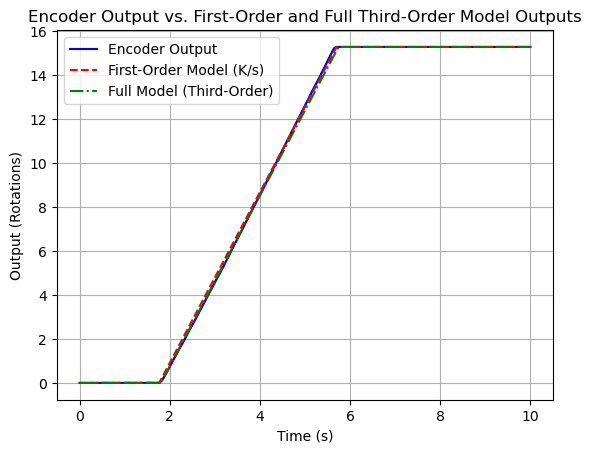

In [50]:
#%%
# Plot encoder output vs. model responses
plt.figure()
if encoder_output is not None:
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label='Encoder Output')
plt.plot(time, y_first, 'r--', linewidth=1.5, label='First-Order Model (K/s)')
plt.plot(time, y_full, 'g-.', linewidth=1.5, label='Full Model (Third-Order)')
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Encoder Output vs. First-Order and Full Third-Order Model Outputs')
plt.legend()
plt.grid(True)
plt.show()

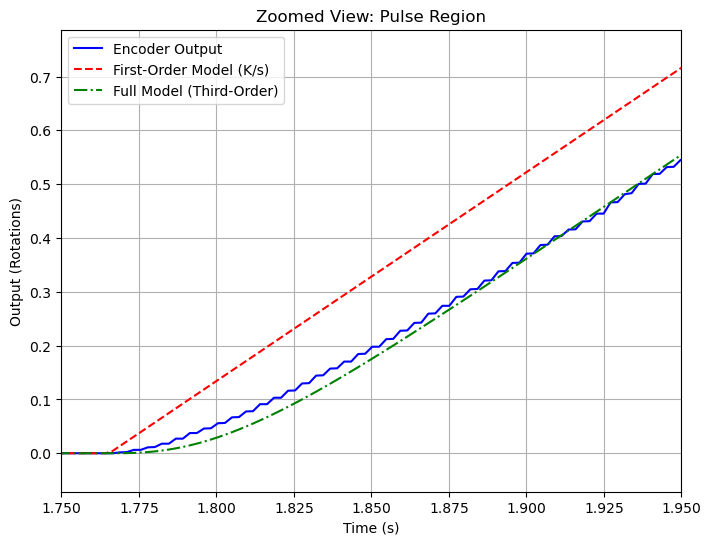

In [51]:
#%%
# Zoomed plot: Pulse region
plt.figure(figsize=(8, 6))
if encoder_output is not None:
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label='Encoder Output')
plt.plot(time, y_first, 'r--', linewidth=1.5, label='First-Order Model (K/s)')
plt.plot(time, y_full, 'g-.', linewidth=1.5, label='Full Model (Third-Order)')
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Zoomed View: Pulse Region')
plt.legend()
plt.grid(True)

# Set zoom limits
zoom_start = 1.75
zoom_end = 1.95
plt.xlim(zoom_start, zoom_end)

# Adjust y-axis limits with padding
mask = (time >= zoom_start) & (time <= zoom_end)
y_first_zoom = y_first[mask]
y_full_zoom = y_full[mask]
if encoder_output is not None:
    encoder_zoom = encoder_output[mask]
    y_min = min(y_first_zoom.min(), y_full_zoom.min(), encoder_zoom.min())
    y_max = max(y_first_zoom.max(), y_full_zoom.max(), encoder_zoom.max())
else:
    y_min = min(y_first_zoom.min(), y_full_zoom.min())
    y_max = max(y_first_zoom.max(), y_full_zoom.max())
padding = 0.1 * (y_max - y_min)
plt.ylim(y_min - padding, y_max + padding)

plt.show()

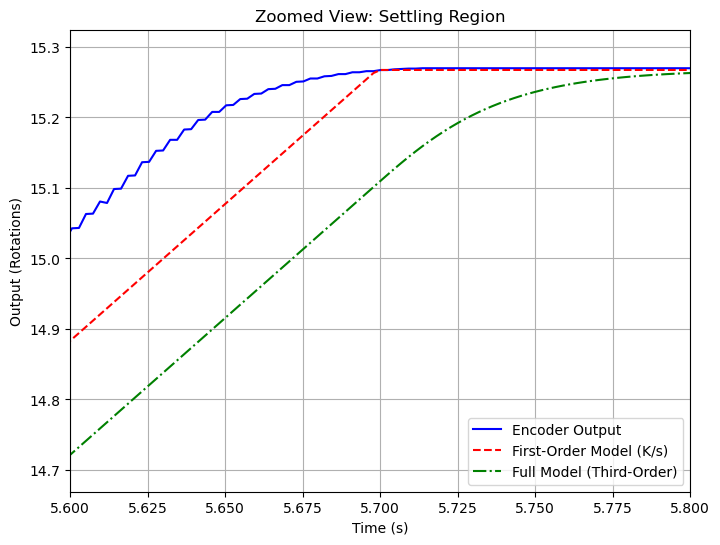

In [52]:
#%%
# Zoomed plot: Settling region
plt.figure(figsize=(8, 6))
if encoder_output is not None:
    plt.plot(time, encoder_output, 'b-', linewidth=1.5, label='Encoder Output')
plt.plot(time, y_first, 'r--', linewidth=1.5, label='First-Order Model (K/s)')
plt.plot(time, y_full, 'g-.', linewidth=1.5, label='Full Model (Third-Order)')
plt.xlabel('Time (s)')
plt.ylabel('Output (Rotations)')
plt.title('Zoomed View: Settling Region')
plt.legend()
plt.grid(True)

# Set zoom limits
zoom_start = 5.6
zoom_end = 5.8
plt.xlim(zoom_start, zoom_end)

# Adjust y-axis limits with padding
mask = (time >= zoom_start) & (time <= zoom_end)
y_first_zoom = y_first[mask]
y_full_zoom = y_full[mask]
if encoder_output is not None:
    encoder_zoom = encoder_output[mask]
    y_min = min(y_first_zoom.min(), y_full_zoom.min(), encoder_zoom.min())
    y_max = max(y_first_zoom.max(), y_full_zoom.max(), encoder_zoom.max())
else:
    y_min = min(y_first_zoom.min(), y_full_zoom.min())
    y_max = max(y_first_zoom.max(), y_full_zoom.max())
padding = 0.1 * (y_max - y_min)
plt.ylim(y_min - padding, y_max + padding)

plt.show()

In [53]:
#%%
import scipy.io as sio

# Load the .mat file
file_path = 'data/pid_data.mat'  # Adjust as needed
mat_data = sio.loadmat(file_path)

# Extract y_plant data
if 'y_plant' in mat_data:
    y_plant = mat_data['y_plant']
    if y_plant.dtype.names and 'Data' in y_plant.dtype.names:
        output = y_plant['Data'][0, 0].flatten()  # Access Data field and flatten
        print("y_plant Data shape:", output.shape)
        print("First few values:", output[:5])
    else:
        print("y_plant has no 'Data' field.")
else:
    print("No 'y_plant' variable found in the file.")

No 'y_plant' variable found in the file.


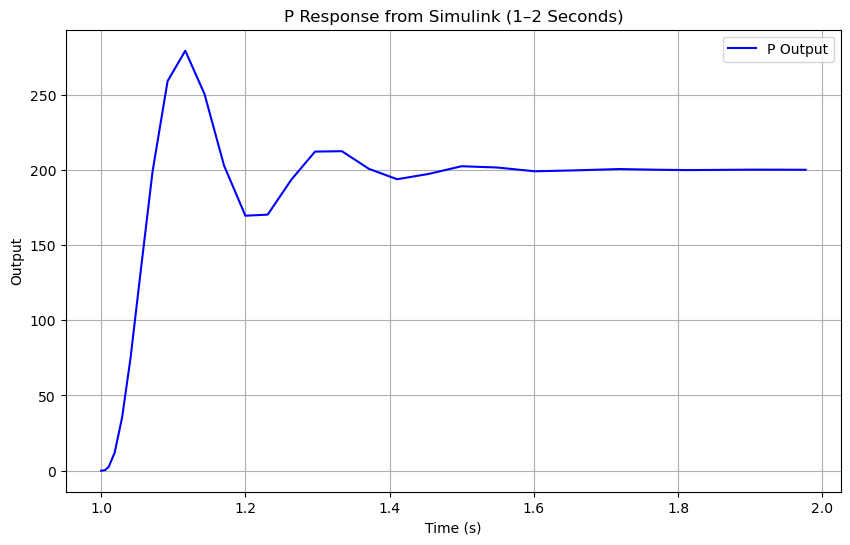

In [54]:
#%%
# Load and plot P controller response
mat_data = sio.loadmat('data/p_data.mat')
time = mat_data['time'].flatten()
output = mat_data['output'].flatten()

# Filter data for 1–2 seconds
mask = (time >= 1) & (time <= 2)
filtered_time = time[mask]
filtered_output = output[mask]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_output, label='P Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('P Response from Simulink (1–2 Seconds)')
plt.grid(True)
plt.legend()
plt.show()

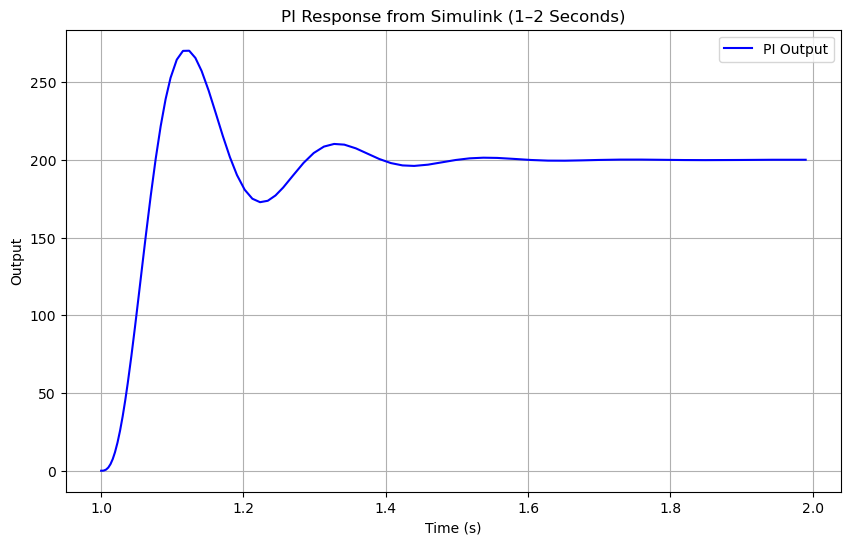

In [55]:
#%%
# Load and plot PI controller response
mat_data = sio.loadmat('data/pi_data.mat')
time = mat_data['time'].flatten()
output = mat_data['output'].flatten()

# Filter data for 1–2 seconds
mask = (time >= 1) & (time <= 2)
filtered_time = time[mask]
filtered_output = output[mask]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_output, label='PI Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('PI Response from Simulink (1–2 Seconds)')
plt.grid(True)
plt.legend()
plt.show()

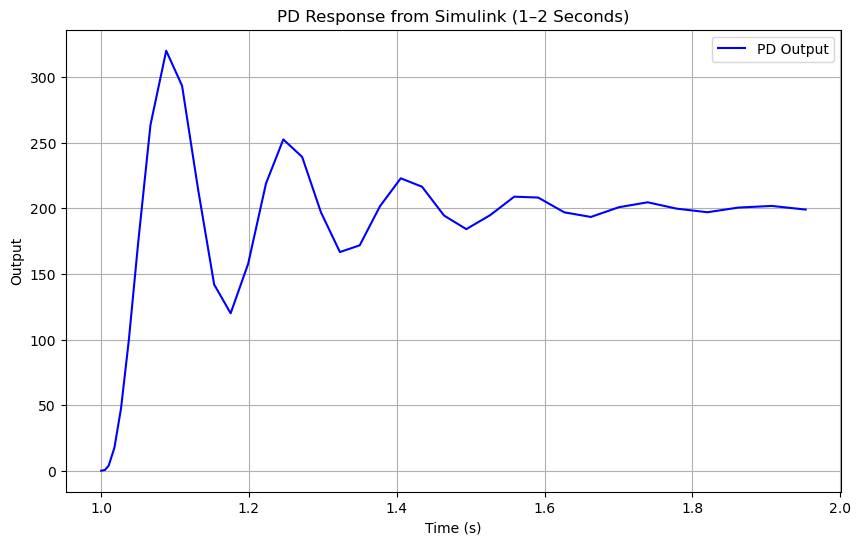

In [56]:
#%%
# Load and plot PD controller response
mat_data = sio.loadmat('data/pd_data.mat')
time = mat_data['time'].flatten()
output = mat_data['output'].flatten()

# Filter data for 1–2 seconds
mask = (time >= 1) & (time <= 2)
filtered_time = time[mask]
filtered_output = output[mask]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_output, label='PD Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('PD Response from Simulink (1–2 Seconds)')
plt.grid(True)
plt.legend()
plt.show()

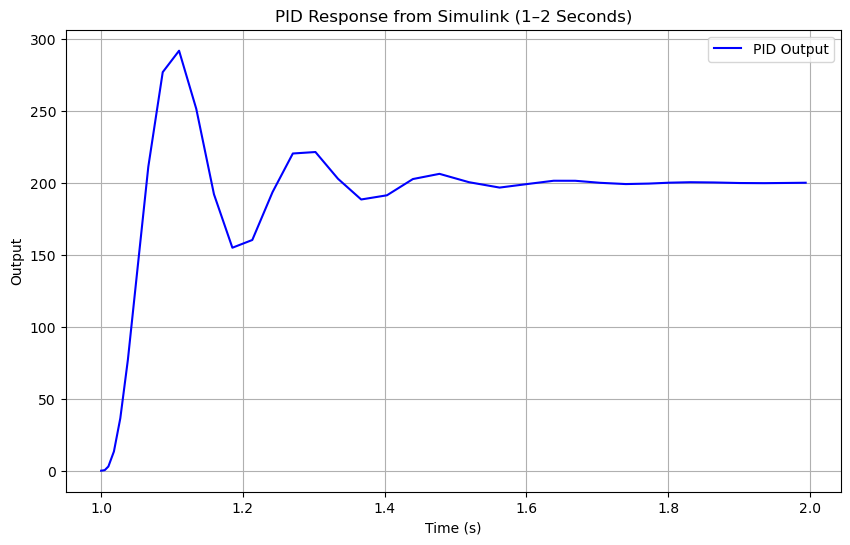

In [57]:
#%%
# Load and plot PID controller response
mat_data = sio.loadmat('data/pid_data.mat')
time = mat_data['time'].flatten()
output = mat_data['output'].flatten()

# Filter data for 1–2 seconds
mask = (time >= 1) & (time <= 2)
filtered_time = time[mask]
filtered_output = output[mask]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_output, label='PID Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('PID Response from Simulink (1–2 Seconds)')
plt.grid(True)
plt.legend()
plt.show()

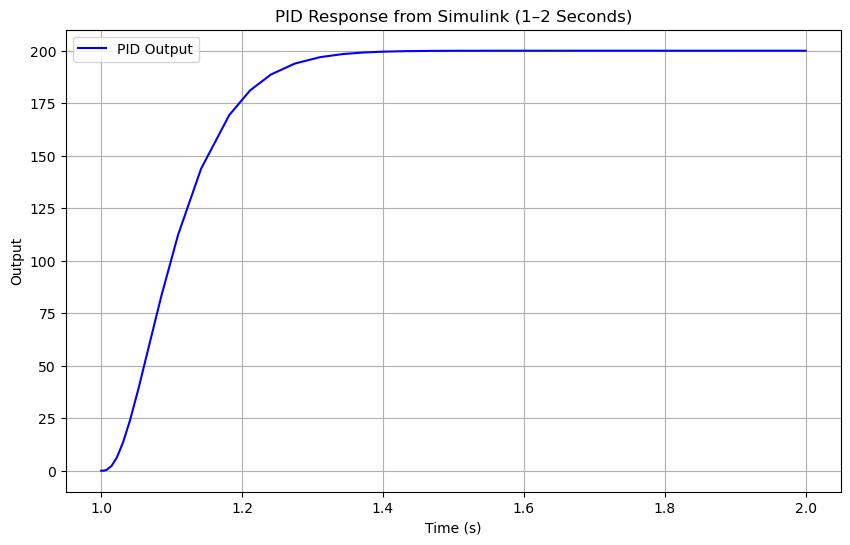

In [58]:
#%%
# Load and plot PID controller response
mat_data = sio.loadmat('data/my_pid.mat')
time = mat_data['time'].flatten()
output = mat_data['output'].flatten()

# Filter data for 1–2 seconds
mask = (time >= 1) & (time <= 2)
filtered_time = time[mask]
filtered_output = output[mask]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_time, filtered_output, label='PID Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('PID Response from Simulink (1–2 Seconds)')
plt.grid(True)
plt.legend()
plt.show()

+-------------------+-----------------+---------------------+-----------------+
| Controller Type   | Rise Time (s)   | Settling Time (s)   | Overshoot (%)   |
+===================+=================+=====================+=================+
| P                 | 0.0713 s        | 0.0713 s            | 39.5551 %       |
+-------------------+-----------------+---------------------+-----------------+
| PI                | 0.0767 s        | 0.0767 s            | 35.1305 %       |
+-------------------+-----------------+---------------------+-----------------+
| PD                | 0.0667 s        | 0.2974 s            | 60.0373 %       |
+-------------------+-----------------+---------------------+-----------------+
| PID               | 0.0666 s        | 0.3342 s            | 45.8951 %       |
+-------------------+-----------------+---------------------+-----------------+
| My PID            | 0.2076 s        | 0.3068 s            | 0.0028 %        |
+-------------------+-----------------+-

/Users/michaelschool/opt/anaconda3/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


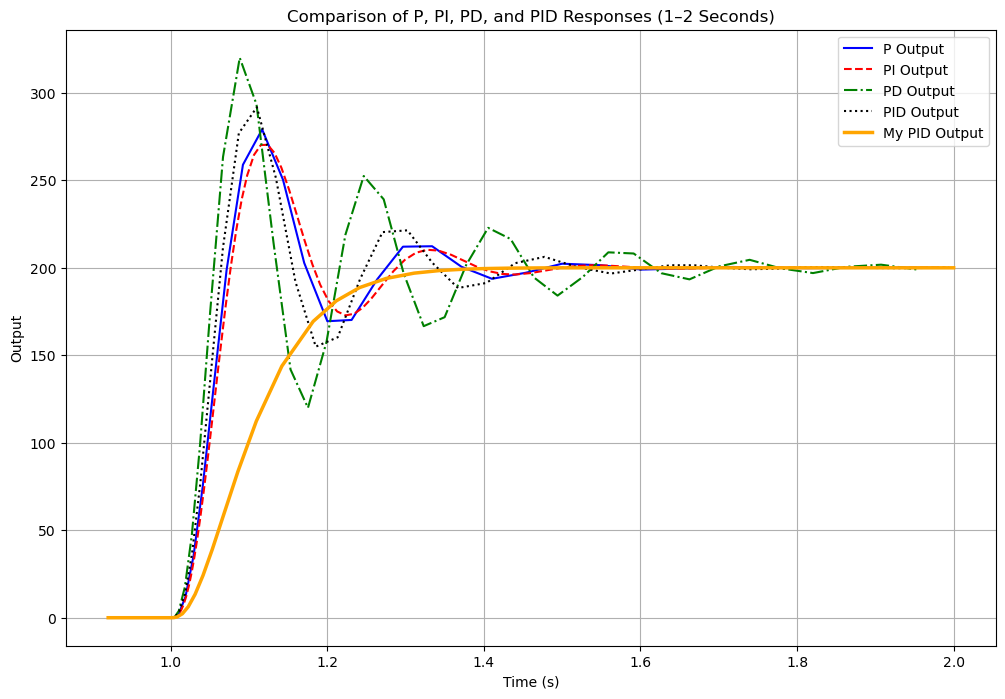

In [62]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate  # For table formatting

plt.figure(figsize=(12, 8))

# Function to compute rise time, settling time, and overshoot
def compute_response_metrics(time, output):
    steady_state_value = output[-1]

    # Find first point where output goes above 0
    start_idx = np.where(output > 0)[0][0]
    start_time = time[start_idx]

    # Find rise time (90% of final value)
    rise_time_idx = np.where(output >= 0.9 * steady_state_value)[0][0]
    rise_time = time[rise_time_idx] - start_time  

    # Find settling time (first time within ±2% of steady-state)
    within_2_percent = np.where((output >= 0.98 * steady_state_value) & 
                                (output <= 1.02 * steady_state_value))[0]
    settling_time = time[within_2_percent[0]] - start_time if len(within_2_percent) > 0 else None

    # Calculate overshoot (%)
    peak_value = np.max(output)
    overshoot = ((peak_value - steady_state_value) / steady_state_value) * 100

    return rise_time, settling_time, overshoot

# Controller Data Processing
controllers = {
    "P": 'data/p_data.mat',
    "PI": 'data/pi_data.mat',
    "PD": 'data/pd_data.mat',
    "PID": 'data/pid_data.mat',
    "My PID": 'data/my_pid.mat'
}

colors = ['b-', 'r--', 'g-.', 'k:', 'orange']
results = []

for (label, file), color in zip(controllers.items(), colors):
    mat_data = sio.loadmat(file)
    time = mat_data['time'].flatten()
    output = mat_data['output'].flatten()

    # Mask for display (1s to 2s)
    mask = (time >= 0.9) & (time <= 2)
    plt.plot(time[mask], output[mask], color, label=f'{label} Output', linewidth=1.5 if label != "My PID" else 2.5)

    # Compute response metrics
    rise_time, settling_time, overshoot = compute_response_metrics(time, output)
    
    # Store results in table format
    results.append([
        label, 
        f"{rise_time:.4f} s", 
        f"{settling_time:.4f} s" if settling_time else "Did not settle", 
        f"{overshoot:.4f} %"
    ])

# Print Table
print(tabulate(results, headers=["Controller Type", "Rise Time (s)", "Settling Time (s)", "Overshoot (%)"], tablefmt="grid"))

# Plot settings
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Comparison of P, PI, PD, and PID Responses (1–2 Seconds)')
plt.grid(True)
plt.legend()
plt.show()
